In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

100%|██████████| 12501/12501 [00:10<00:00, 1211.76it/s]
Cats: 12476
Dogs: 12470


In [3]:
training_data = np.load('training_data.npy', allow_pickle=True)

In [4]:
print(len(training_data))

24946


In [6]:
print(training_data[1])

[array([[154,  95, 116, ..., 137, 141, 155],
       [150,  84, 112, ..., 128, 152, 163],
       [134,  87, 106, ..., 140, 162, 163],
       ...,
       [184, 182, 108, ..., 206, 188, 187],
       [167, 167, 144, ..., 190, 190, 189],
       [176, 176,  99, ..., 185, 193, 185]], dtype=uint8)
 array([1., 0.])]


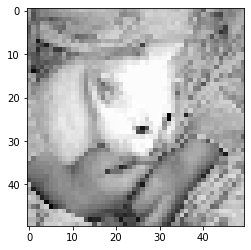

In [10]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show()

array([1., 0.])